## Übung Machine Learning 1: Decision Tree in sklearn

### 1. Laden und Vorverarbeiten der Daten (9 Punkte)

1.1 Laden Sie die beiden Datensätze "contract_data.csv" und "calls_data.xlsx" mit Pandas (3 Punkte)

In [37]:
import pandas as pd

df_1 = pd.read_csv("DATA/contract_data.csv")
df_2 = pd.read_excel(open('DATA/calls_data.xls', 'rb'), sheet_name='default_1')

1.2 Verknüpfen Sie die beiden Datensätze (Schlüsselattribut = Spalte "Area Code" und "Phone") mit der Pandas-Funktion `merge()` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) (3 Punkte)

In [38]:
df = df_1.merge(df_2, left_on=['Phone','Area Code'], right_on=['Phone','Area Code'], how='inner')
df

,Account Length,Churn,Int'l Plan,VMail Plan,State,Area Code,Phone,VMail Message,Day Mins,Eve Mins,...,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,0,0,1,KS,415,382-4657,25,265.1,197.4,...,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,0,0,1,OH,415,371-7191,26,161.6,195.5,...,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,0,0,NJ,415,358-1921,0,243.4,121.2,...,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,1,0,OH,408,375-9999,0,299.4,61.9,...,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,1,0,OK,415,330-6626,0,166.7,148.3,...,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,0,1,AZ,415,414-4276,36,156.2,215.5,...,9.9,2,77,26.55,126,18.32,83,12.56,6,2.67
3329,68,0,0,0,WV,415,370-3271,0,231.1,153.4,...,9.6,3,57,39.29,55,13.04,123,8.61,4,2.59
3330,28,0,0,0,RI,510,328-8230,0,180.8,288.8,...,14.1,2,109,30.74,58,24.55,91,8.64,6,3.81
3331,184,0,1,0,CT,510,364-6381,0,213.8,159.6,...,5.0,2,105,36.35,84,13.57,137,6.26,10,1.35


1.3 Sklearn's Decision Tree kann nicht mit kategorischen Werten umgehen. Entfernen Sie daher mit Hilfe der pandas-Funktion `drop()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) die kategorischen Spalten "Area Code", "Phone" und "State" aus dem Datensatz. (Sie werden zu einem späteren Zeitpunkt lernen, wie Sie die kategorischen Spalten mit numerischen Werten codieren und somit dann doch wieder verwenden können. In der heutigen Übung können Sie die Spalten aber einfach ignorieren.) (3 Punkte)

In [39]:
df = df.drop(['Area Code', 'Phone', 'State'], axis=1)
df

,Account Length,Churn,Int'l Plan,VMail Plan,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,0,0,1,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,0,0,1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,0,0,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,1,0,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,1,0,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,0,1,36,156.2,215.5,279.1,9.9,2,77,26.55,126,18.32,83,12.56,6,2.67
3329,68,0,0,0,0,231.1,153.4,191.3,9.6,3,57,39.29,55,13.04,123,8.61,4,2.59
3330,28,0,0,0,0,180.8,288.8,191.9,14.1,2,109,30.74,58,24.55,91,8.64,6,3.81
3331,184,0,1,0,0,213.8,159.6,139.2,5.0,2,105,36.35,84,13.57,137,6.26,10,1.35


### 2. Partitionierung (4 Punkte)

Unterteilen Sie die Daten mit Hilfe der Funktion ``train_test_split`` in ``sklearn`` in Trainings- und Testdaten (im Verhältnis 90:10) (4 Punkte)

In [40]:
from sklearn.model_selection import train_test_split
X = df[['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### 3. Bauen des Entscheidungsbaums (3 Punkte)

Instanziieren Sie sklearn's `DecisionTreeClassifier` und lernen Sie mit Hilfe der Trainingsdaten den Entscheidungsbaum (3 Punkte)

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(X_train, y_train)

### 4. Evaluierung (5 Punkte)

4.1 Wenden Sie den Entscheidungsbaum auf die Testdaten an (2 Punkte)

In [42]:
from sklearn import metrics
pred = model.predict(X_test)

4.2 Berechnen Sie die Accuracy des Modells (1 Punkt)

In [43]:
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy: ", round(accuracy*100, 4),"%")

Accuracy:  91.3174 %


4.3 Geben Sie die Confusion Matrix des Modells aus (1 Punkt)

In [44]:
matr = metrics.confusion_matrix(y_test, pred)
print("Matrix: \n", matr)

Matrix: 
 [[264  17]
 [ 12  41]]


4.4 Geben Sie einen Klassifikations-Report aus (1 Punkt)

In [45]:
report = metrics.classification_report(y_test, pred)
print("Report:\n",report)

Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       281
           1       0.71      0.77      0.74        53

    accuracy                           0.91       334
   macro avg       0.83      0.86      0.84       334
weighted avg       0.92      0.91      0.91       334



### 5. Tuning (7 Punkte)

Bisher haben wir das Modell einfach mit den Default-Parametern ausgeführt. Lässt sich durch andere Paramtereinstellungen eine Verbesserung erzielen? 
Führen Sie mit Hilfe von `GridSearchCV` eine Kreuzvalidierung durch und suchen Sie damit optimale Einstellungen für mind. 2 der Parameter des Decision Trees. (4 Punkte)

In [46]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [47]:
grid = {"max_depth":np.arange(1,25), "criterion":("gini", "entropy")}

Geben Sie die besten Parameter und den Score, den Sie damit auf den Trainingsdaten erzielen können, aus. (1 Punkt)

In [48]:
new_model = DecisionTreeClassifier()
new_model = GridSearchCV(new_model, grid, cv = 10)
new_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

Überprüfen Sie, ob Sie damit auf den Testdaten ein besseres Ergebnis erzielen können, indem Sie auf dem neuen Modell ebenfalls die Accuracy auf den Testdaten berechnen (2 Punkte)

In [49]:
new_model.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [50]:
new_model.best_score_

0.9473221850613154

### 6. Cumulative Gain Curve (7 Punkte)

6.1 Erstellen Sie eine Cumulative Gain Curve (Tipp: Sie können dafür das Paket `scikitplot` verwenden) (4 Punkte) 

In [51]:
import scikitplot as skplt

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

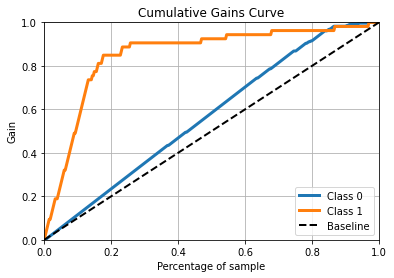

In [52]:
y_probas = new_model.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

6.2 Interpretieren Sie die Cumulative Gain Curve. Können Sie daraus eine praxisrelevante Aussage ableiten? (3 Punkte)

Die cumulative Gain Curve zeigt uns, dass der Klassifikator eine Instanz von dier Klasse 1 (Kunde wandert ab) sehr gut von der Klasse 0 unterscheiden kann. Der Gewinn der Informationen ist nicht perfekt -> siehe den obereren Teil, aber schon sehr gut.

Im Gegenzug hierzu kann der Klassifikator die Klasse 0 (Kunde wandert nicht ab) nicht gut erkenen. Wenn der Kunde also nicht abwandert, kann dies der Algorithmus nicht gut klassifizieren. Der Grund könnten zu wenig Daten für diesen Fall sein. Optimal wäre, wenn er die Klassen gut unterscheiden könnte und damit die Gewinnkurve recht senkrecht nach oben und dann nach rechts gehen würde.


### 7. Ausgabe des Entscheidungsbaums (5 Punkte)

Geben Sie den Entscheidungsbaum aus. Sie können hierfür entweder die Methode `export_text` verwenden (für eine textuelle Ausgabe) oder die Methode `plot_tree` (um den Baum zu zeichnen). Beide Methoden finden Sie im Package `sklearn.tree`. Tipp: Beschränken Sie die Ausgabe der Übersichtlichkeit halber auf die ersten Ebenen des Baumes.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html bzw. https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

Sie können der Anleitung hier folgen: https://mljar.com/blog/visualize-decision-tree/ <br>
(Dort finden Sie auch noch 2 andere Methoden, um den Baum zu zeichnen)

In [53]:
from sklearn.tree import export_text, plot_tree

opt_model = new_model.best_estimator_
export_text(opt_model, max_depth=1)

'|--- feature_10 <= 44.96\n|   |--- feature_8 <= 3.50\n|   |   |--- truncated branch of depth 5\n|   |--- feature_8 >  3.50\n|   |   |--- truncated branch of depth 5\n|--- feature_10 >  44.96\n|   |--- feature_2 <= 0.50\n|   |   |--- truncated branch of depth 5\n|   |--- feature_2 >  0.50\n|   |   |--- truncated branch of depth 3\n'

[Text(167.4, 181.2, 'X[10] <= 44.96\ngini = 0.246\nsamples = 2999\nvalue = [2569, 430]'),
 Text(83.7, 108.72, 'X[8] <= 3.5\ngini = 0.201\nsamples = 2813\nvalue = [2494, 319]'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.481\nsamples = 186\nvalue = [75, 111]'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

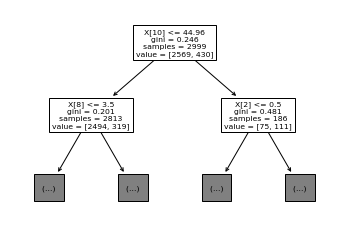

In [54]:
plot_tree(opt_model, max_depth=1)